Reading the CSV file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/content/books.csv")

Q1: How many rows and columns are there in books.csv dataset?

In [2]:
num_rows = data.shape[0]
num_columns = data.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 399
Number of columns: 24


Q2: How many books do not have an original title?

In [3]:
books_without_original_title = data[data['original_title'].isnull()]['title'].count()
print(f"Number of books without an original title: {books_without_original_title}")

Number of books without an original title: 36


Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [4]:
df = data.dropna(subset=['original_title'])
unique_books = df['book_id'].nunique()
print(f"Number of unique books in the dataset: {unique_books}")

Number of unique books in the dataset: 363


Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [5]:
df = data.dropna(subset=['average_rating'])
average_rating = df['average_rating'].mean()
print(f"Average rating of all the books in the dataset: {average_rating}")

Average rating of all the books in the dataset: 3.9837844611528817


Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [6]:
books_published_in_2000 = data[data['original_publication_year'] == 2000]
number_of_books = len(books_published_in_2000)
print(f"Number of books published in the year 2000: {number_of_books}")

Number of books published in the year 2000: 8


Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [7]:
df = data.sort_values(by='work_ratings_count', ascending=False)
book_with_max_ratings = df.iloc[0]['original_title']
print(f"Book with maximum number of ratings: {book_with_max_ratings}")

Book with maximum number of ratings: Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944


Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

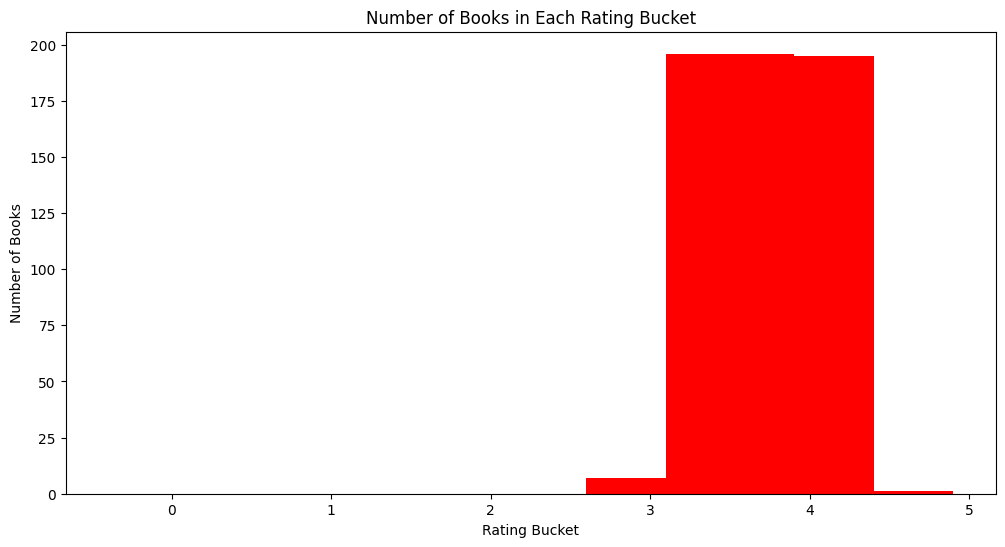

In [9]:
buckets = np.arange(0, 5.5, 0.5)
data['rating_bucket'] = pd.cut(df['average_rating'], buckets, labels=buckets[:-1], include_lowest=True)
rating_counts = data['rating_bucket'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(rating_counts.index, rating_counts.values, color='red')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.show()